## Chapter 7: Classification (Protein Secondary Structure)

In [60]:
import pandas as pd
import numpy as np

import missingno as msno
from sklearn.metrics import classification_report


In [36]:
dfx = pd.read_csv("../../datasets/protein_structure_sequence/dataset_pdb_no_dups.csv")
dfx.shape

(141401, 14)

In [39]:
dfx.structureId.nunique()

140911

In [40]:
dfx = dfx.drop_duplicates(["structureId"])
dfx.shape

(140911, 14)

In [41]:
dfx.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [42]:
dfx = dfx[["classification", "residueCount", "resolution", "resolution", "crystallizationTempK", "densityMatthews", "densityPercentSol", "phValue"]]

<AxesSubplot:>

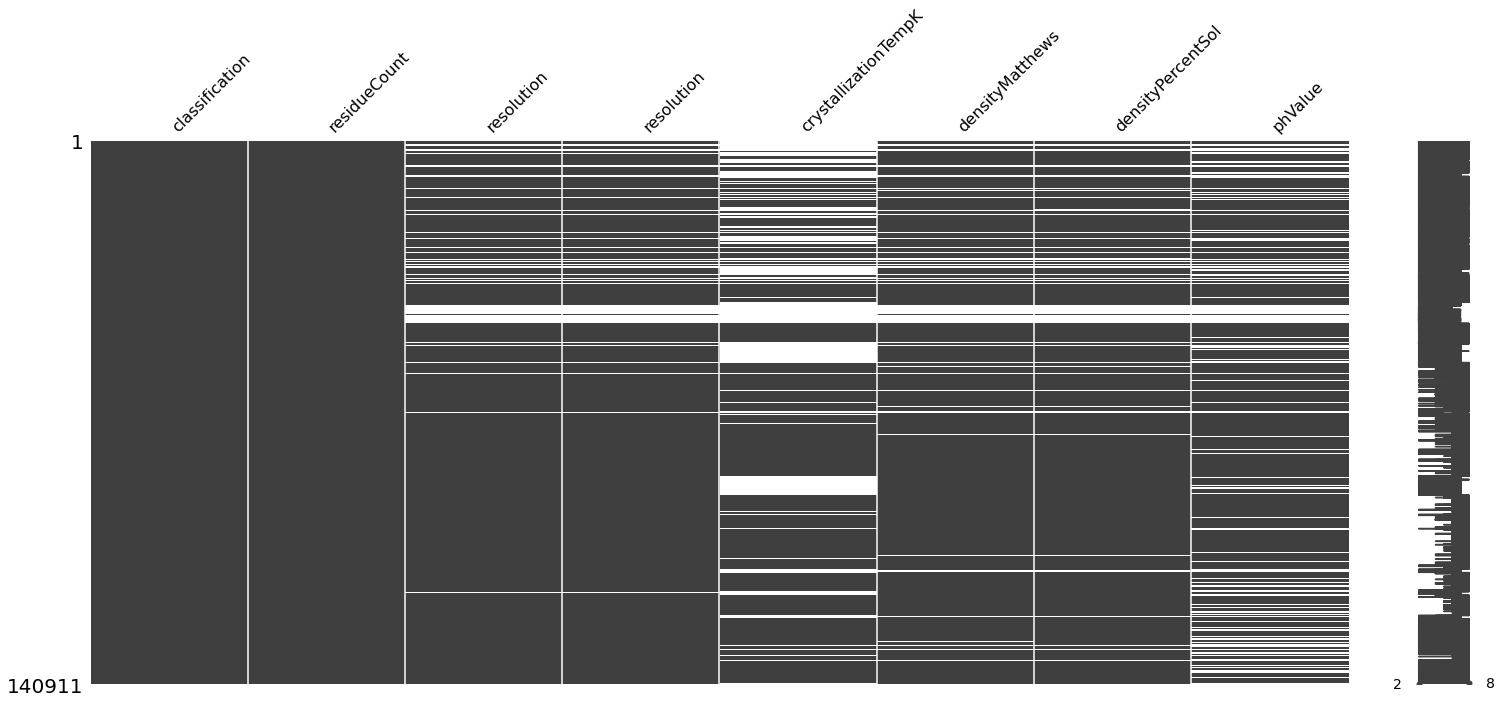

In [43]:
msno.matrix(dfx)

In [44]:
dfx.classification.value_counts()

HYDROLASE                                                 20872
TRANSFERASE                                               15722
OXIDOREDUCTASE                                            12450
LYASE                                                      4312
IMMUNE SYSTEM                                              4067
                                                          ...  
SIGNALING PROTEIN/Transcription                               1
CELL CYCLE/TRANSFERASE SUBSTRATE                              1
LIPID BINDING PROTEIN, ANTIMICROBIAL PROTEIN, ALLERGEN        1
PLANT SEED STORAGE PROTEIN (VICILIN)                          1
DNA BINDING PROTEIN/HYDROLASE                                 1
Name: classification, Length: 5050, dtype: int64

In [78]:
df2 = dfx.groupby("classification").filter(lambda x: len(x) > 14000)

In [79]:
df2.classification.value_counts()

HYDROLASE      20872
TRANSFERASE    15722
Name: classification, dtype: int64

<AxesSubplot:>

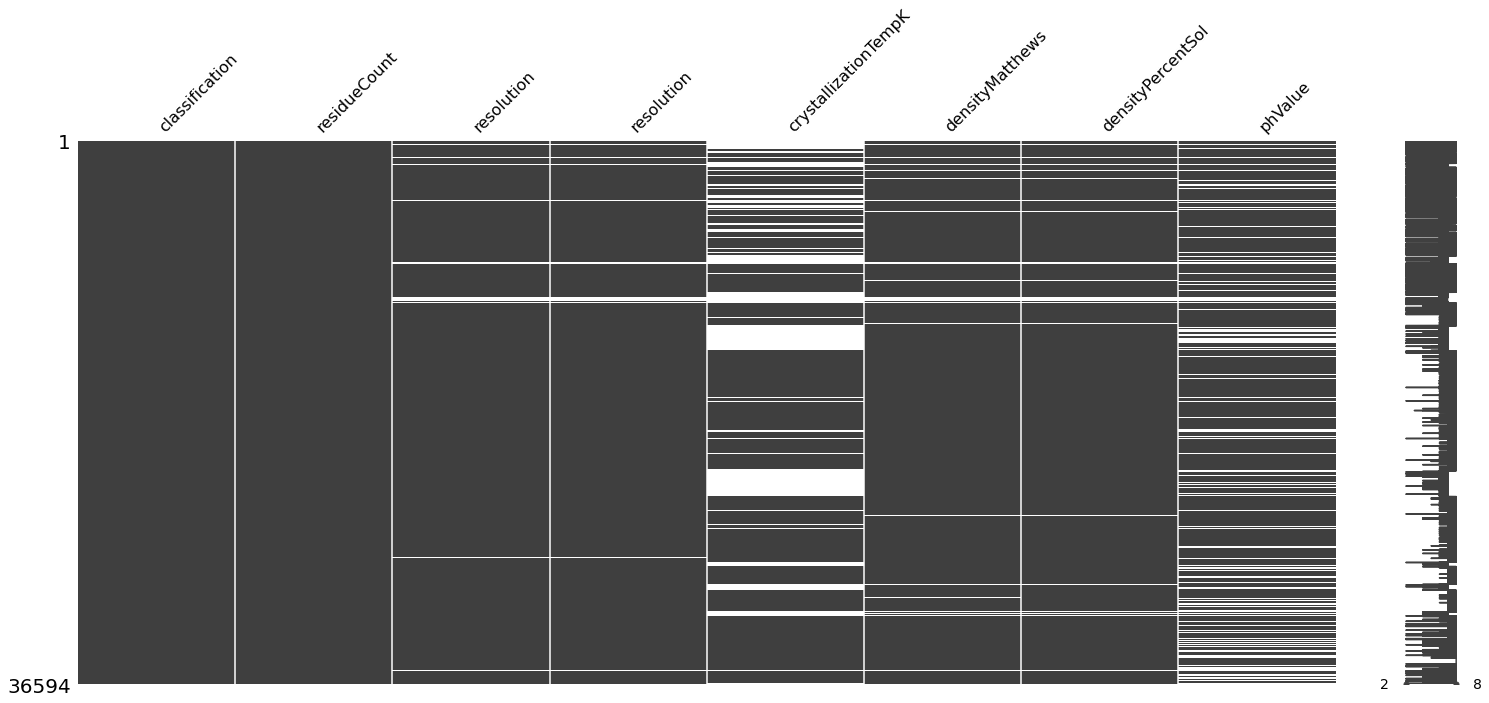

In [80]:
msno.matrix(df2)

In [81]:
df2 = df2.dropna()
df2.shape

(24187, 8)

<AxesSubplot:>

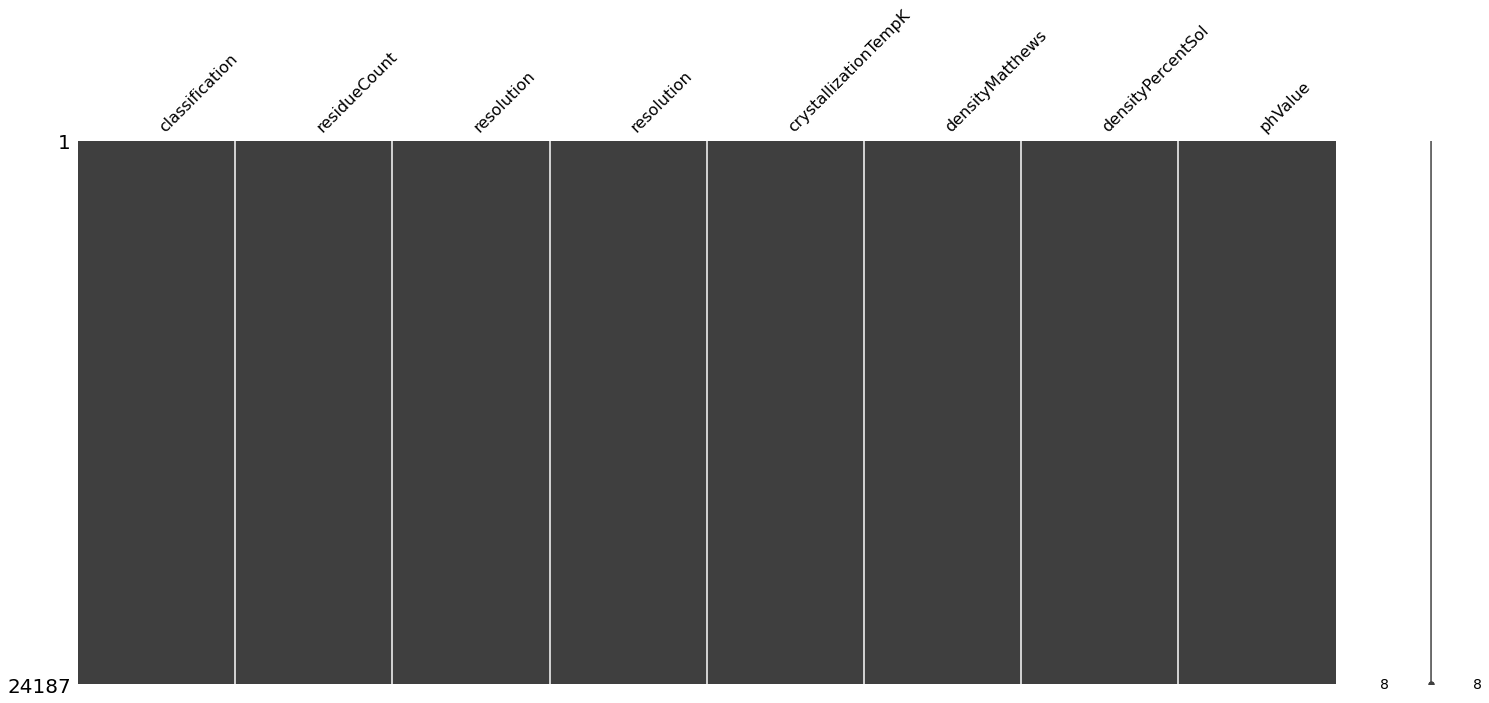

In [82]:
msno.matrix(df2)

In [83]:
df2.classification.value_counts()

HYDROLASE      13669
TRANSFERASE    10518
Name: classification, dtype: int64

In [84]:
X = df2.drop(columns=["classification"])
y = df2.classification.values.ravel()

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   HYDROLASE       0.73      0.76      0.74      3373
 TRANSFERASE       0.68      0.65      0.67      2674

    accuracy                           0.71      6047
   macro avg       0.71      0.70      0.71      6047
weighted avg       0.71      0.71      0.71      6047



In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   HYDROLASE       0.66      0.68      0.67      3373
 TRANSFERASE       0.58      0.56      0.57      2674

    accuracy                           0.62      6047
   macro avg       0.62      0.62      0.62      6047
weighted avg       0.62      0.62      0.62      6047



In [89]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   HYDROLASE       0.62      0.73      0.67      3373
 TRANSFERASE       0.57      0.45      0.50      2674

    accuracy                           0.60      6047
   macro avg       0.59      0.59      0.59      6047
weighted avg       0.60      0.60      0.60      6047



In [90]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(n_estimators=1000)
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   HYDROLASE       0.66      0.71      0.68      3373
 TRANSFERASE       0.60      0.55      0.57      2674

    accuracy                           0.64      6047
   macro avg       0.63      0.63      0.63      6047
weighted avg       0.63      0.64      0.63      6047



In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.4)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   HYDROLASE       0.74      0.76      0.75      3373
 TRANSFERASE       0.69      0.67      0.68      2674

    accuracy                           0.72      6047
   macro avg       0.71      0.71      0.71      6047
weighted avg       0.72      0.72      0.72      6047



In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=10000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

[19:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



              precision    recall  f1-score   support

   HYDROLASE       0.77      0.78      0.77      3373
 TRANSFERASE       0.72      0.71      0.71      2674

    accuracy                           0.75      6047
   macro avg       0.74      0.74      0.74      6047
weighted avg       0.75      0.75      0.75      6047

